In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import matplotlib

In [45]:
K=nx.Graph()
for i in range(7):
    K.add_node(i)
poss=nx.circular_layout(K)

In [48]:
def read_graph(FN):
    G=nx.Graph()
    f=open(FN)
    s=f.read()
    f.close()
    s=s.split('\n')
    for i in s:
        #print(i)
        v1,v2=i.split(',')
        G.add_edge(int(v1),int(v2))
    return G

def read_iso(FN):
    f=open(FN)
    s=f.read()
    f.close()
    s=s.split('\n')[1:]
    
    n=len(s)
    #print("size:",n,'\n')
    iso=[0 for i in range(n)]
    for i in s:
        v1,v2=i.split(':')
        v1=int(v1)
        v2=float(v2)
        iso[v1]=v2.__round__(3)
        
    return iso

def read_vul(FN):
    f=open(FN)
    s=f.read()
    f.close()
    s=s.split('\n')[1:]
    
    n=len(s)
    vul=[0 for i in range(n)]
    for i in s:
        v1,v2=i.split(':')
        v1=int(v1)
        v2=float(v2)
        vul[v1]=v2.__round__(3)
        
    return vul

def make_labels(l):
    d={}
    for i in range(len(l)):
        d[str(i)]=l[i]
    return d

All colorings of nodes are relative within graph


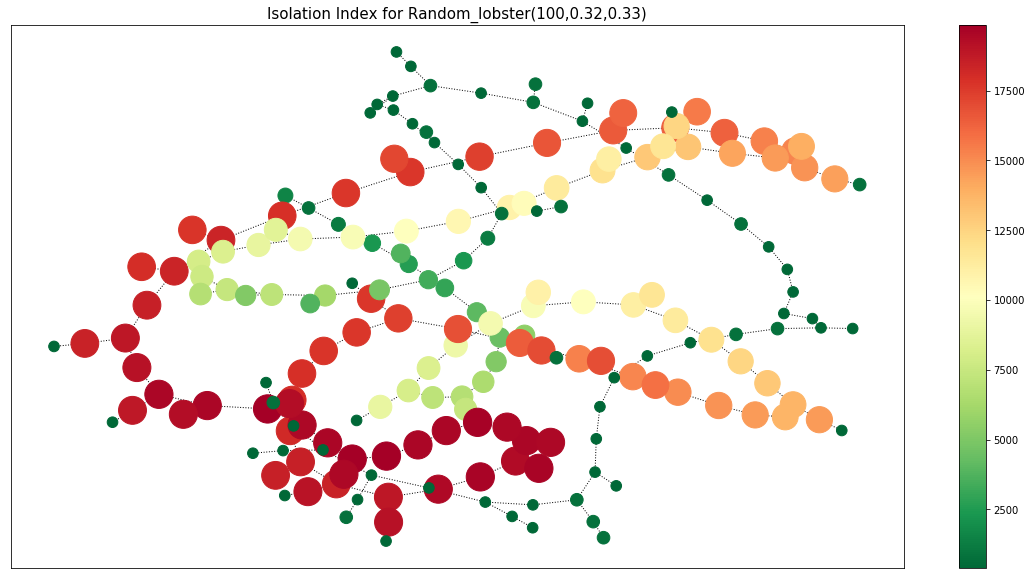

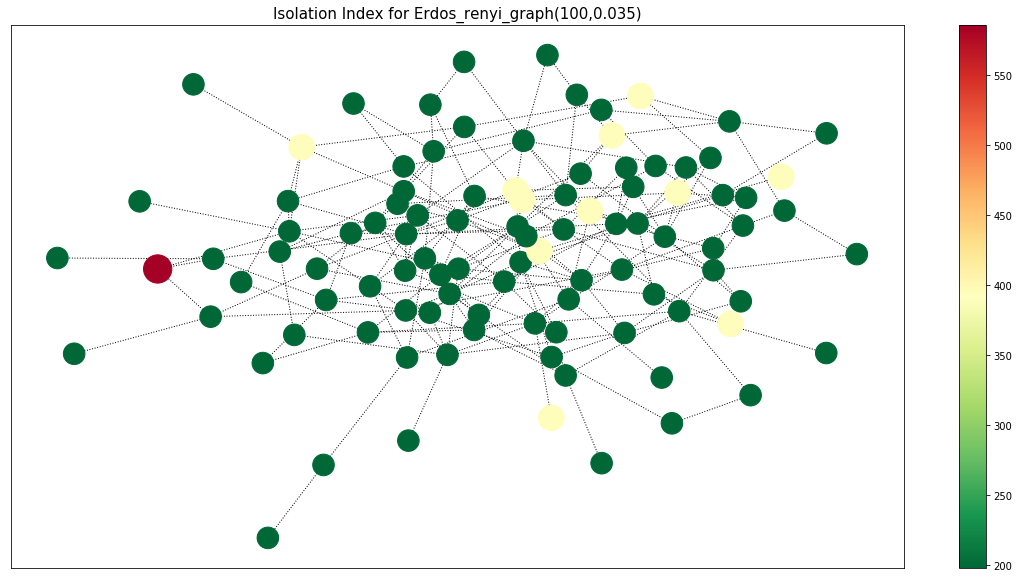

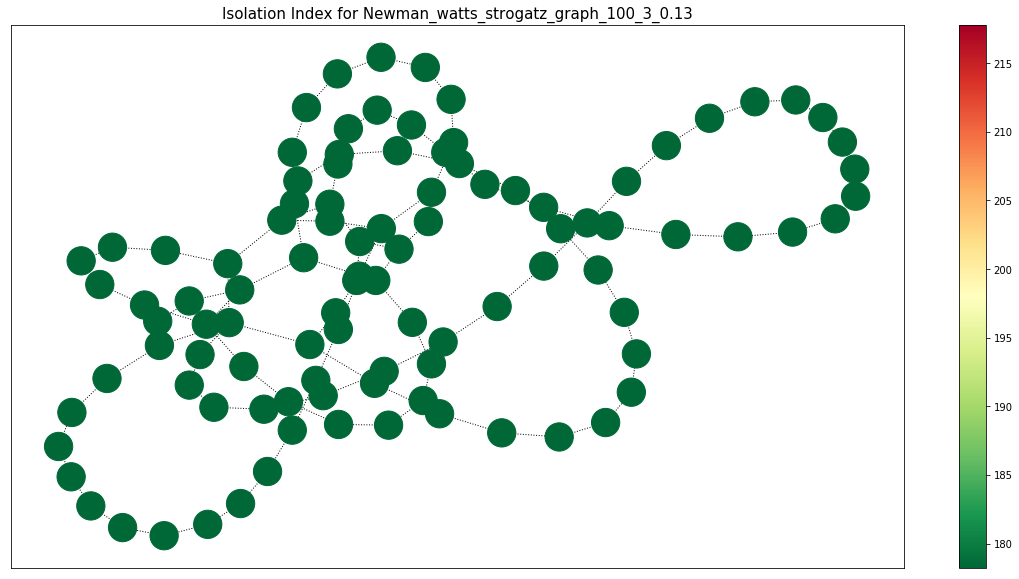

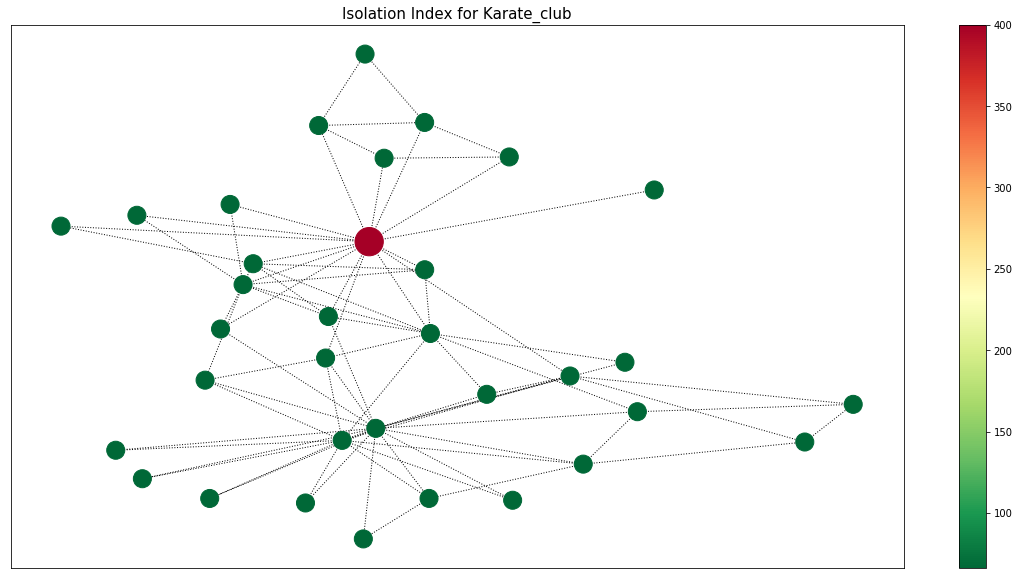

In [49]:
## specific graphs isolation index
GRAPHS=['random_lobster(100,0.32,0.33)','erdos_renyi_graph(100,0.035)','newman_watts_strogatz_graph_100_3_0.13','karate_club']
print("All colorings of nodes are relative within graph")
for j in GRAPHS:
    grapht=j
    #print(j)
    G=read_graph(os.path.join('input',grapht+'.txt'))
    iso=read_iso(os.path.join('iso_output','output_'+grapht+'_1.txt'))
    #print(iso)
    
    #
    cmap = plt.cm.RdYlGn_r
    norm = matplotlib.colors.Normalize(vmin=min(iso), vmax=max(iso))
    fig, ax = plt.subplots(figsize=(20,10))
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])  # only needed for matplotlib < 3.1
    fig.colorbar(sm)
    #
    
    nx.draw_networkx(G,with_labels=False,cmap='RdYlGn_r',node_color=iso,font_color='b',style='dotted',node_size=800*(np.array(iso)/max(iso))**0.5,font_weight='normal',font_size=15)
    plt.title('Isolation Index for '+j.capitalize(),fontsize=15)
    plt.show()

All colorings of nodes are relative within graph
size: 7 



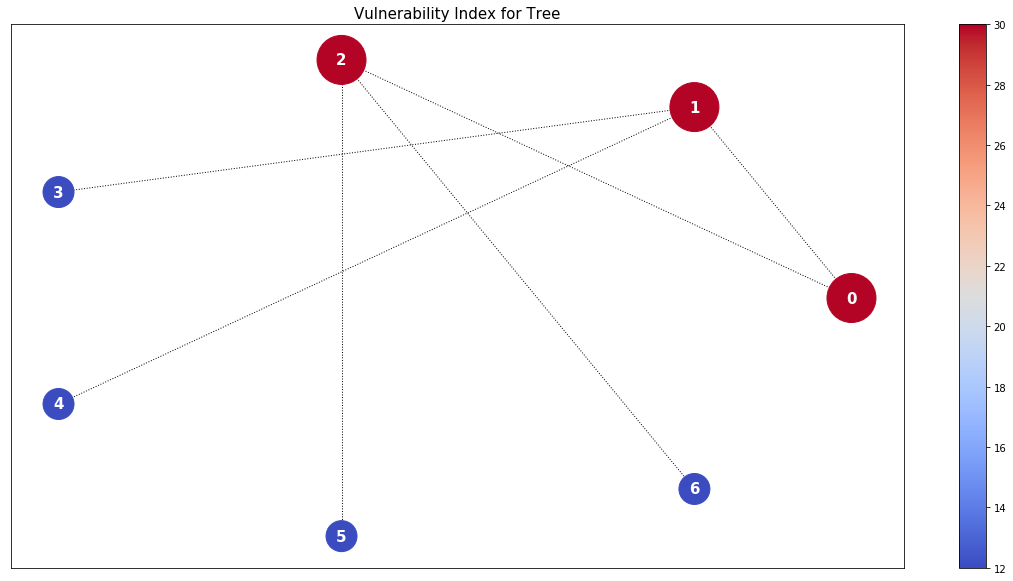

size: 7 



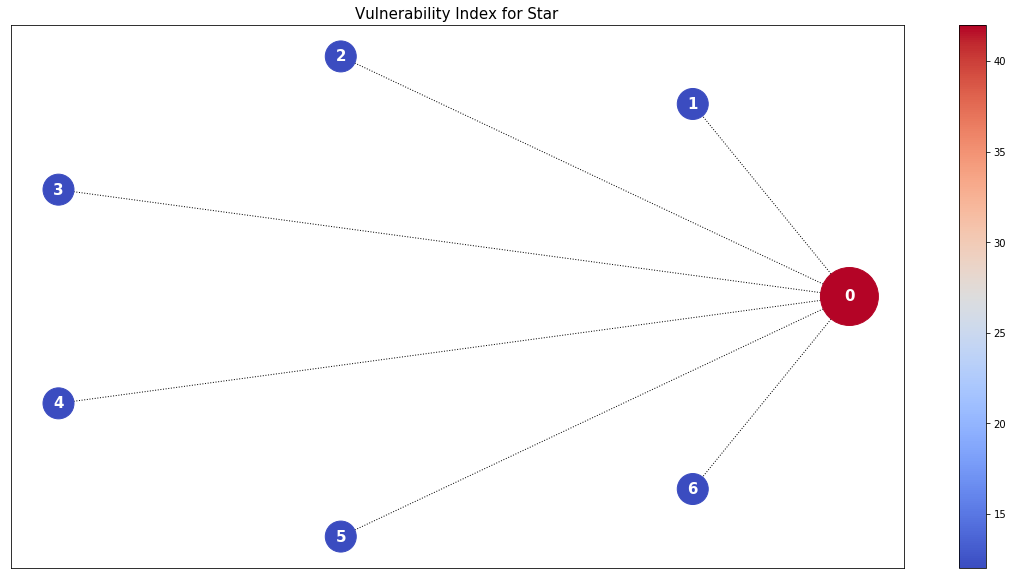

size: 7 



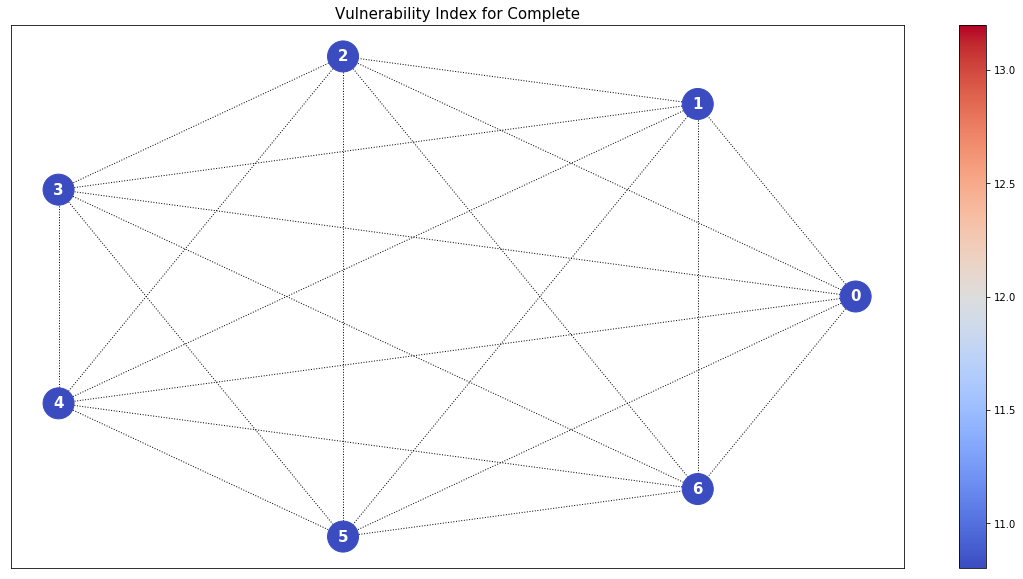

size: 7 



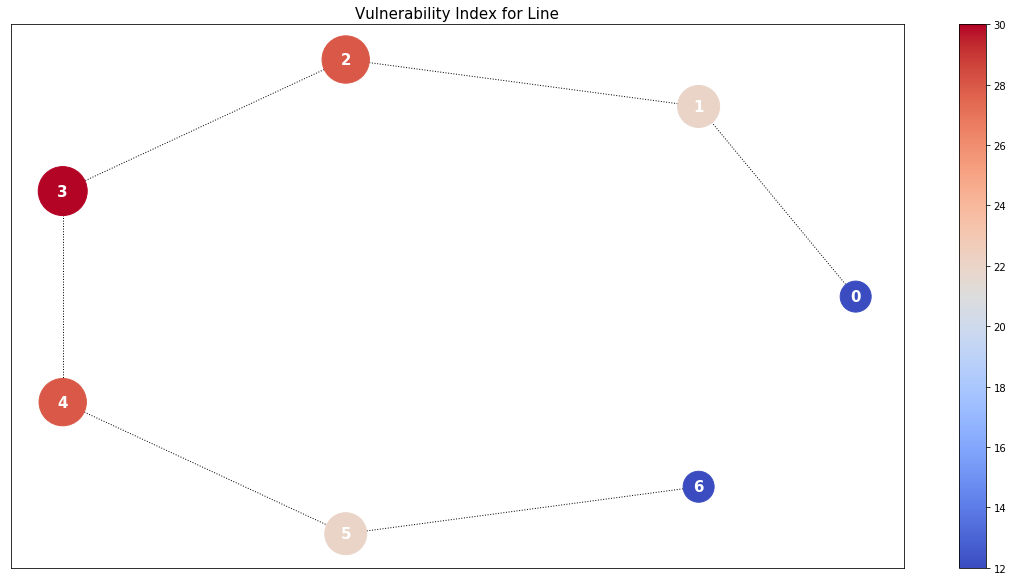

size: 7 



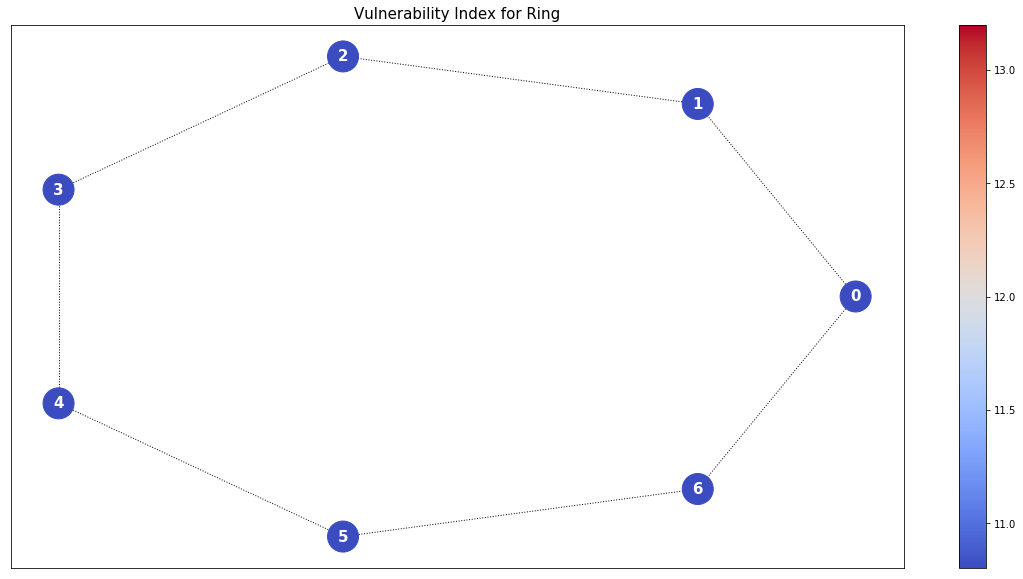

In [46]:
## iso index
GRAPHS=['tree','star','complete','line','ring']
print("All colorings of nodes are relative within graph")
for j in GRAPHS:
    grapht=j
    G=read_graph(os.path.join('input',grapht+'.txt'))
    iso=np.array(read_iso(os.path.join('iso_output','output_'+grapht+'_1.txt')))
    #
    cmap = plt.cm.coolwarm
    norm = matplotlib.colors.Normalize(vmin=min(iso), vmax=max(iso))
    fig, ax = plt.subplots(figsize=(20,10))
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])  # only needed for matplotlib < 3.1
    fig.colorbar(sm)
    #
    nx.draw_networkx(G,pos=poss,cmap='coolwarm',node_color=iso,node_size=80*iso,font_color='w',style='dotted',font_weight='heavy',font_size=15)
    plt.title('Vulnerability Index for '+j.capitalize(),fontsize=15)
    plt.show()

All colorings of nodes are relative within graph


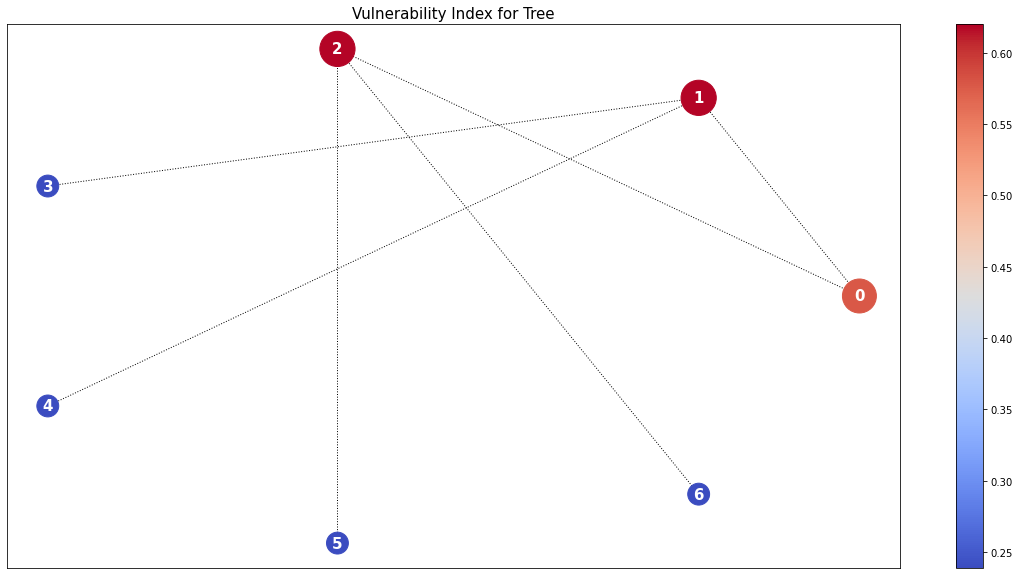

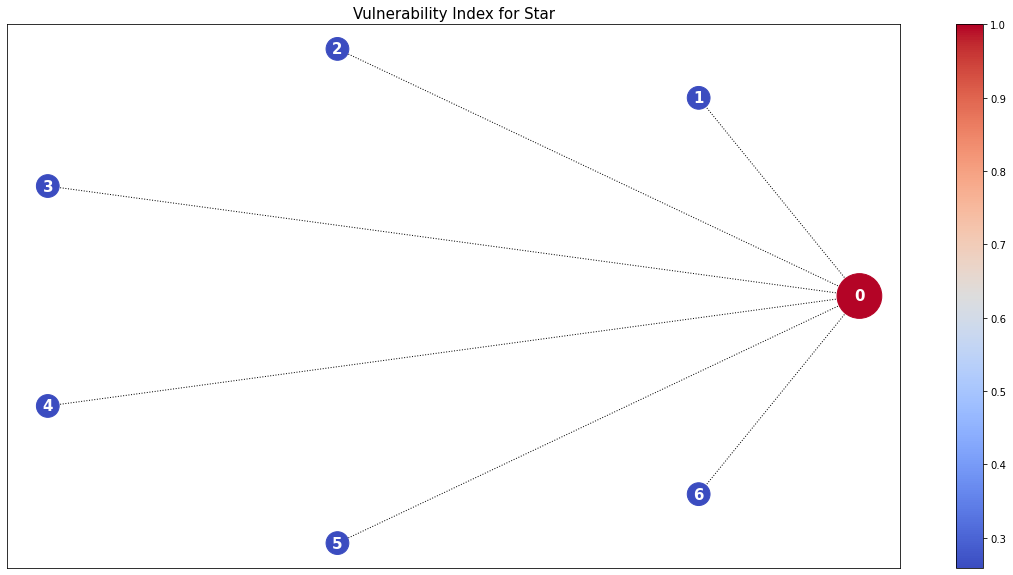

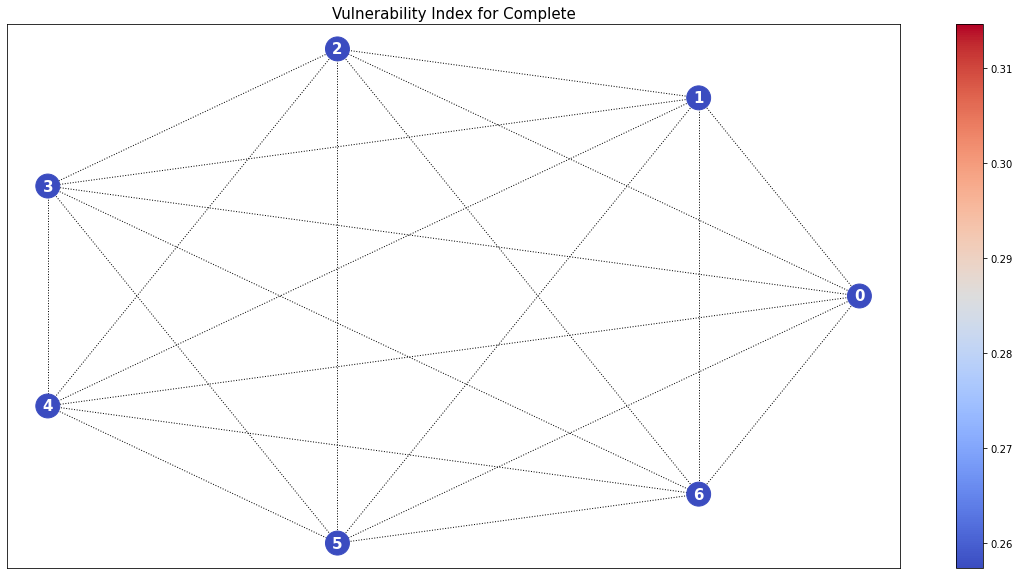

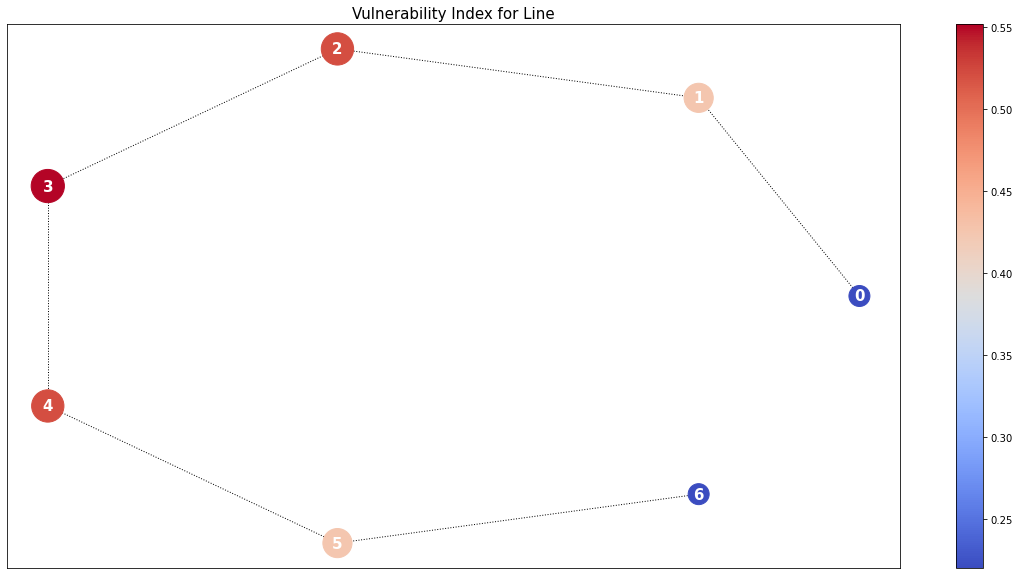

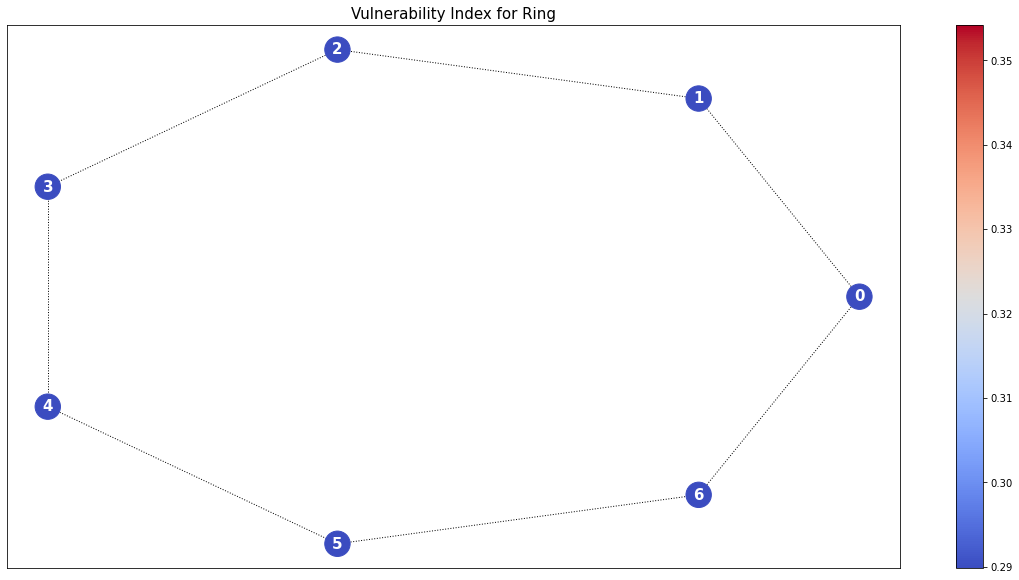

In [196]:
## Vul index
GRAPHS=['tree','star','complete','line','ring']
print("All colorings of nodes are relative within graph")
for j in GRAPHS:
    grapht=j
    G=read_graph(os.path.join('input',grapht+'.txt'))
    vul=np.array(read_vul(os.path.join('output','output_'+grapht+'_local.txt')))
    #
    cmap = plt.cm.coolwarm
    norm = matplotlib.colors.Normalize(vmin=min(vul), vmax=max(vul))
    fig, ax = plt.subplots(figsize=(20,10))
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])  # only needed for matplotlib < 3.1
    fig.colorbar(sm)
    #
    nx.draw_networkx(G,pos=poss,cmap='coolwarm',node_color=vul,node_size=80*25*vul,font_color='w',style='dotted',font_weight='heavy',font_size=15)
    plt.title('Vulnerability Index for '+j.capitalize(),fontsize=15)
    plt.show()

In [197]:
def make_df():
    n=7
    vul={}
    iso={}
    GRAPHS=['tree','star','complete','line','ring']
    for j in GRAPHS:
        grapht=j
        j=j.capitalize()
        iso[j]=read_iso(os.path.join('iso_output','output_'+grapht+'_1.txt'))
        vul[j]=np.array(read_vul(os.path.join('output','output_'+grapht+'_local.txt')))
        
    df=pd.DataFrame()
    df['Graph Type']=[i.capitalize() for i in GRAPHS]
    for i in range(n):
        df['Vul('+str(i)+')']=[vul[j.capitalize()][i].__round__(3) for j in GRAPHS]
        df['Iso('+str(i)+')']=[iso[j.capitalize()][i].__round__(3) for j in GRAPHS]
    return df

df=make_df()
df

,Graph Type,Vul(0),Iso(0),Vul(1),Iso(1),Vul(2),Iso(2),Vul(3),Iso(3),Vul(4),Iso(4),Vul(5),Iso(5),Vul(6),Iso(6)
0,Tree,0.577,30.0,0.620,30.0,0.620,30.0,0.239,12.0,0.239,12.0,0.239,12.0,0.239,12.0
1,Star,1.000,42.0,0.259,12.0,0.259,12.0,0.259,12.0,0.259,12.0,0.259,12.0,0.259,12.0
2,Complete,0.286,12.0,0.286,12.0,0.286,12.0,0.286,12.0,0.286,12.0,0.286,12.0,0.286,12.0
3,Line,0.220,12.0,0.425,22.0,0.522,28.0,0.552,30.0,0.522,28.0,0.425,22.0,0.220,12.0
4,Ring,0.322,12.0,0.322,12.0,0.322,12.0,0.322,12.0,0.322,12.0,0.322,12.0,0.322,12.0


In [4]:
def get_data():
    n=7
    vul={}
    iso={}
    GRAPHS=['tree','star','complete','line','ring']
    for j in GRAPHS:
        grapht=j
        j=j.capitalize()
        iso[j]=read_iso(os.path.join('iso_output','output_'+grapht+'_1.txt'))
        vul[j]=np.array(read_vul(os.path.join('output','output_'+grapht+'_local.txt')))
    dt=np.zeros((5,14))
    for j in range(7):
        dt[:,7+j]=np.array([iso[k.capitalize()][j].__round__(3) for k in GRAPHS])
        dt[:,j]=np.array([vul[k.capitalize()][j].__round__(3) for k in GRAPHS])
        
    return dt

index = pd.MultiIndex.from_product([['tree','star','complete','line','ring']],
                                   names=['Graphs'])
columns = pd.MultiIndex.from_product([['Vulnerability','Isolation'], np.arange(7)],
                                     names=['Index', 'node'])

## data
data = get_data()
# create the DataFrame
df = pd.DataFrame(data, index=index, columns=columns)
df

Index    Vulnerability                                           Isolation  \
node                 0      1      2      3      4      5      6         0   
Graphs                                                                       
tree             0.577  0.620  0.620  0.239  0.239  0.239  0.239      30.0   
star             1.000  0.259  0.259  0.259  0.259  0.259  0.259      42.0   
complete         0.286  0.286  0.286  0.286  0.286  0.286  0.286      12.0   
line             0.220  0.425  0.522  0.552  0.522  0.425  0.220      12.0   
ring             0.322  0.322  0.322  0.322  0.322  0.322  0.322      12.0   

Index                                         
node         1     2     3     4     5     6  
Graphs                                        
tree      30.0  30.0  12.0  12.0  12.0  12.0  
star      12.0  12.0  12.0  12.0  12.0  12.0  
complete  12.0  12.0  12.0  12.0  12.0  12.0  
line      22.0  28.0  30.0  28.0  22.0  12.0  
ring      12.0  12.0  12.0  12.0  12.0  12.0

In [201]:
def get_data2():
    n=7
    vul={}
    iso={}
    GRAPHS=['tree','star','complete','line','ring']
    for j in GRAPHS:
        grapht=j
        j=j.capitalize()
        iso[j]=read_iso(os.path.join('iso_output','output_'+grapht+'_1.txt'))
        vul[j]=np.array(read_vul(os.path.join('output','output_'+grapht+'_local.txt')))
    dt=np.zeros((35,2))
    c=0
    for k in GRAPHS:
        for i in range(7):
            dt[c*7+i][0]=iso[k.capitalize()][i].__round__(3)
            dt[c*7+i][1]=vul[k.capitalize()][i].__round__(3) 
        c+=1

    return dt

index = pd.MultiIndex.from_product([['tree','star','complete','line','ring'], np.arange(7)],
                                   names=['Graphs','Nodes'])
columns = pd.MultiIndex.from_product([['Isolation', 'Vulnerability']],
                                     names=['Index'])

## data
data = get_data2()
# create the DataFrame
df = pd.DataFrame(data, index=index, columns=columns)
df

Index          Isolation Vulnerability
Graphs   Nodes                        
tree     0          30.0         0.577
         1          30.0         0.620
         2          30.0         0.620
         3          12.0         0.239
         4          12.0         0.239
         5          12.0         0.239
         6          12.0         0.239
star     0          42.0         1.000
         1          12.0         0.259
         2          12.0         0.259
         3          12.0         0.259
         4          12.0         0.259
         5          12.0         0.259
         6          12.0         0.259
complete 0          12.0         0.286
         1          12.0         0.286
         2          12.0         0.286
         3          12.0         0.286
         4          12.0         0.286
         5          12.0         0.286
         6          12.0         0.286
line     0          12.0         0.220
         1          22.0         0.425
         2          28.0         0.522
         3          30.0         0.552
         4          28.0         0.522
         5          22.0         0.425
         6          12.0         0.220
ring     0          12.0         0.322
         1          12.0         0.322
         2          12.0         0.322
         3          12.0         0.322
         4          12.0         0.322
         5          12.0         0.322
         6          12.0         0.322

In [202]:
def get_data3():
    n=7
    vul={}
    iso={}
    GRAPHS=['tree','star','complete','line','ring']
    for j in GRAPHS:
        grapht=j
        j=j.capitalize()
        iso[j]=read_iso(os.path.join('iso_output','output_'+grapht+'_1.txt'))
        vul[j]=np.array(read_vul(os.path.join('output','output_'+grapht+'_local.txt')))
    dt=np.zeros((40,2))
    c=0
    for k in GRAPHS:
        for i in range(8):
            if i%8!=7:
                dt[c*8+i][0]=iso[k.capitalize()][i].__round__(3)
                dt[c*8+i][1]=vul[k.capitalize()][i].__round__(3) 
            else:
                dt[c*8+i][0]=sum([dt[c*8+ll][0] for ll in range(7)]).__round__(3)/7
                dt[c*8+i][1]=sum([dt[c*8+ll][1] for ll in range(7)]).__round__(3)/7
                
        c+=1

    return dt


index = pd.MultiIndex.from_product([['tree','star','complete','line','ring'], [0,1,2,3,4,5,6,'Average']],
                                   names=['Graphs','Nodes'])
columns = pd.MultiIndex.from_product([['Isolation', 'Vulnerability']],
                                     names=['Index'])
## data
data = get_data3()
# create the DataFrame
df = pd.DataFrame(data, index=index, columns=columns)
df

Index             Isolation Vulnerability
Graphs   Nodes                           
tree     0        30.000000      0.577000
         1        30.000000      0.620000
         2        30.000000      0.620000
         3        12.000000      0.239000
         4        12.000000      0.239000
         5        12.000000      0.239000
         6        12.000000      0.239000
         Average  19.714286      0.396143
star     0        42.000000      1.000000
         1        12.000000      0.259000
         2        12.000000      0.259000
         3        12.000000      0.259000
         4        12.000000      0.259000
         5        12.000000      0.259000
         6        12.000000      0.259000
         Average  16.285714      0.364857
complete 0        12.000000      0.286000
         1        12.000000      0.286000
         2        12.000000      0.286000
         3        12.000000      0.286000
         4        12.000000      0.286000
         5        12.000000      0.286000
         6        12.000000      0.286000
         Average  12.000000      0.286000
line     0        12.000000      0.220000
         1        22.000000      0.425000
         2        28.000000      0.522000
         3        30.000000      0.552000
         4        28.000000      0.522000
         5        22.000000      0.425000
         6        12.000000      0.220000
         Average  22.000000      0.412286
ring     0        12.000000      0.322000
         1        12.000000      0.322000
         2        12.000000      0.322000
         3        12.000000      0.322000
         4        12.000000      0.322000
         5        12.000000      0.322000
         6        12.000000      0.322000
         Average  12.000000      0.322000

In [203]:
def get_data4():
    n=7
    vul={}
    iso={}
    GRAPHS=['tree','star','complete','line','ring']
    for j in GRAPHS:
        grapht=j
        j=j.capitalize()
        tmp=read_iso(os.path.join('iso_output','output_'+grapht+'_1.txt'))
        iso[j]=np.array(tmp)/max(tmp)
        tmp=read_vul(os.path.join('output','output_'+grapht+'_local.txt'))
        vul[j]=np.array(tmp)/max(tmp)

    return iso,vul

In [204]:
iso,vul=get_data4()

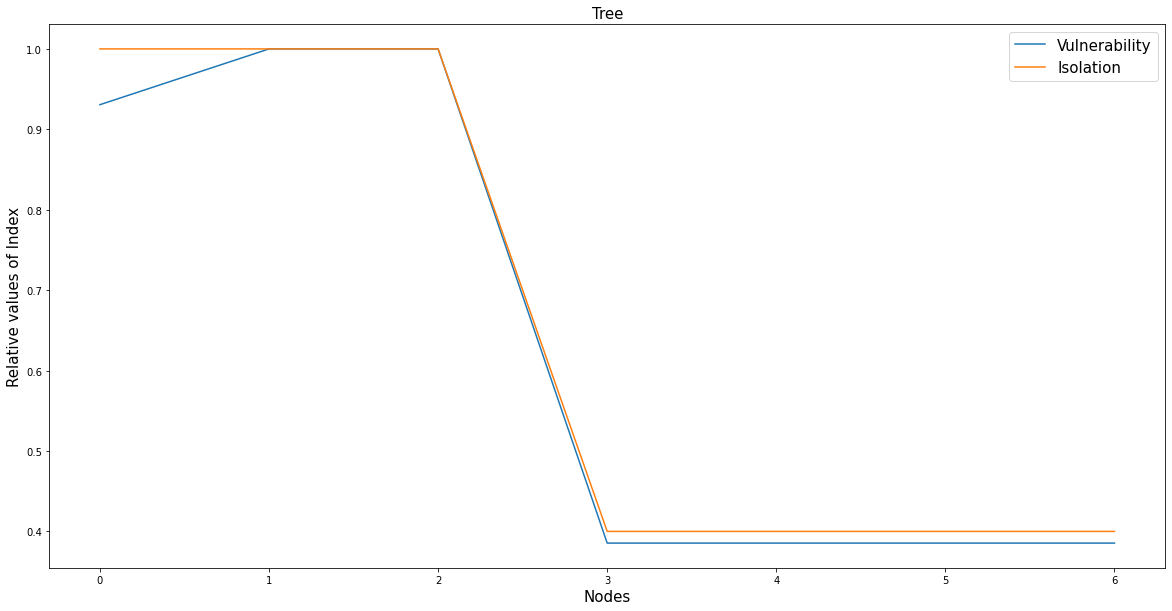

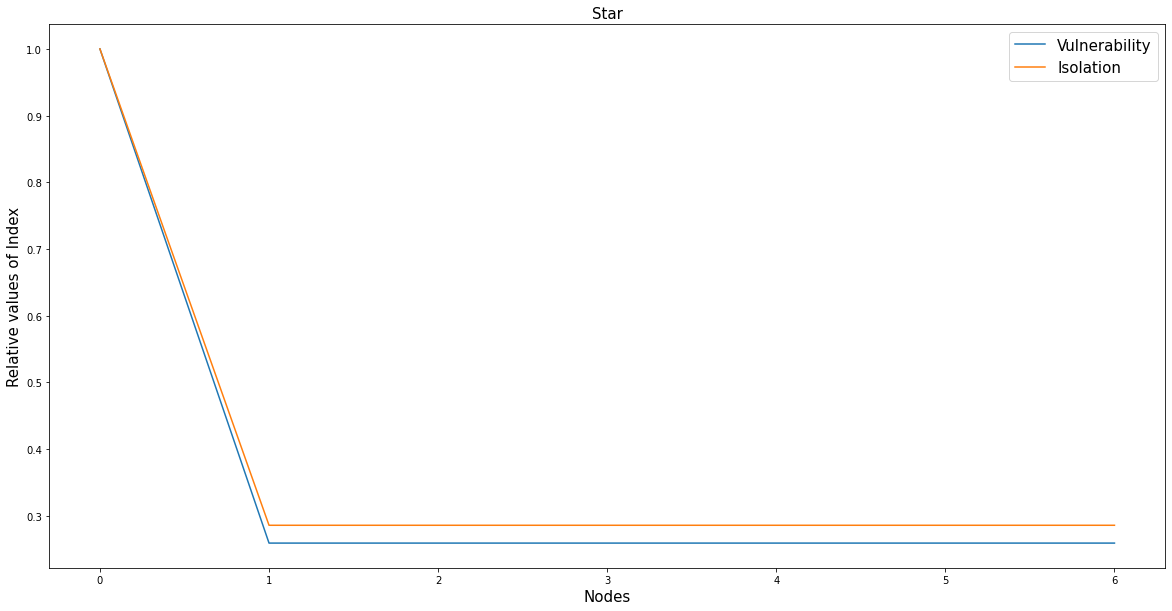

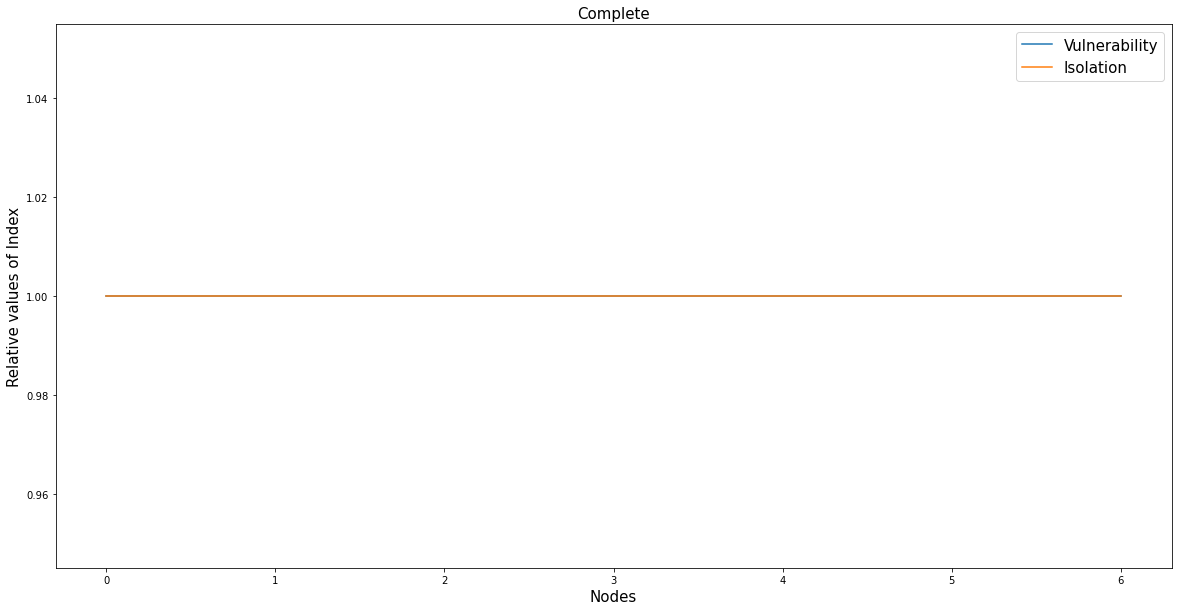

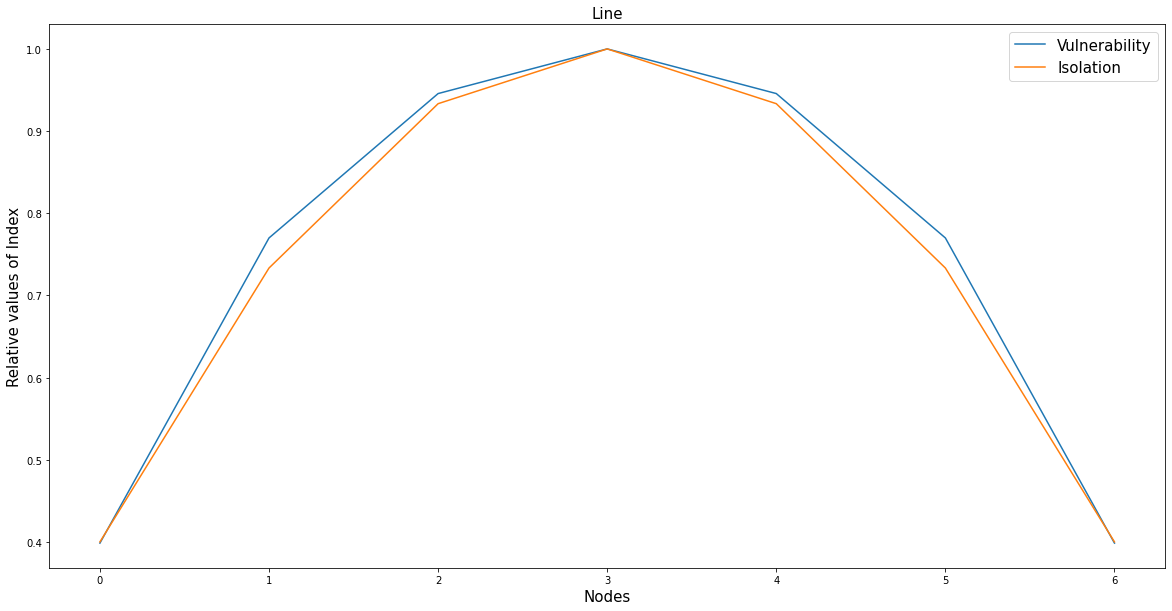

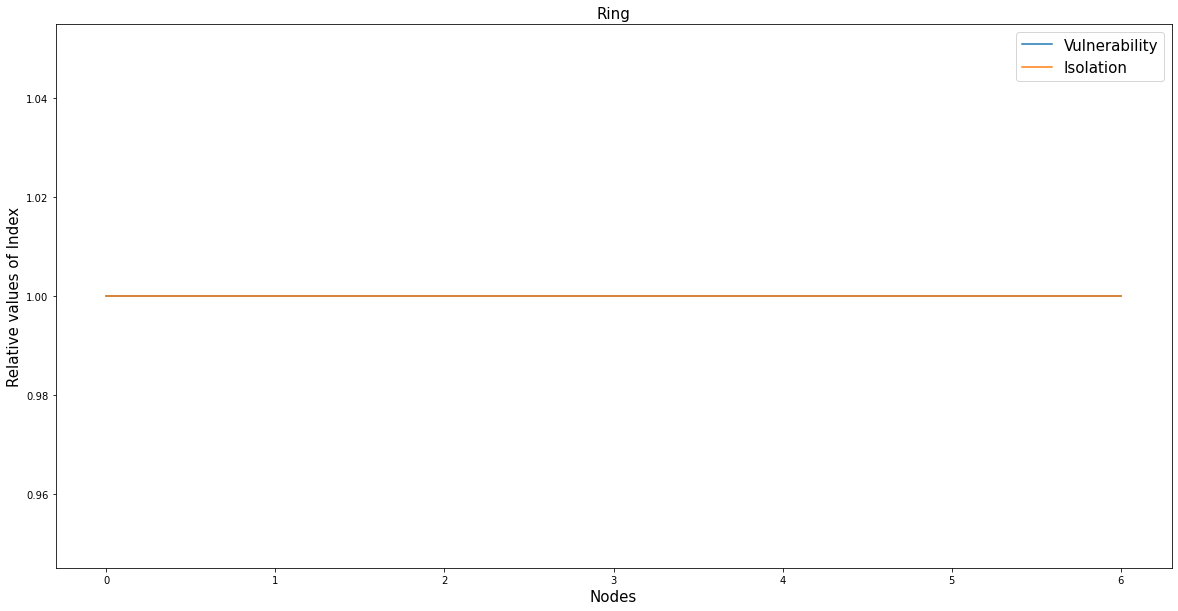

In [205]:
for j in ['tree','star','complete','line','ring']:
    which=j.capitalize()
    plt.figure(figsize=(20,10))
    plt.plot(vul[which])
    plt.plot(iso[which])
    plt.title(which,fontsize=15)
    plt.legend(['Vulnerability','Isolation'],fontsize=15)
    plt.xlabel('Nodes',fontsize=15)
    plt.ylabel('Relative values of Index',fontsize=15)
    plt.show()